In [ ]:
# Abdülhalim YAYDEMİR

### Orjinal Salinas görüntüsü

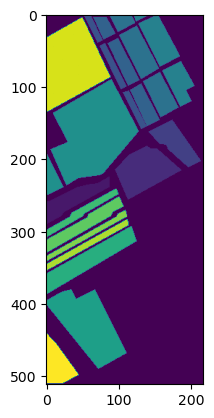

In [50]:
# kütüphaneler
import numpy as np
import matplotlib.pyplot as plt

# .mat dosyasını okumak için kullanıldı.
from scipy.io import loadmat


# .mat dosyası okundu ve 2 boyutlu dataseti arraya aktarıldı.
salinas = loadmat("Salinas_gt.mat")
salinas = salinas["salinas_gt"]

# orjinal salinas görüntüsü
fig_salinas,ax=plt.subplots()
ax.imshow(salinas)
plt.show()


### K-means Algoritması

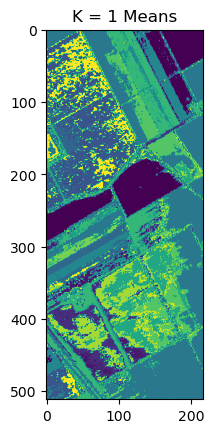

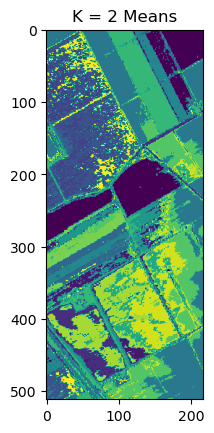

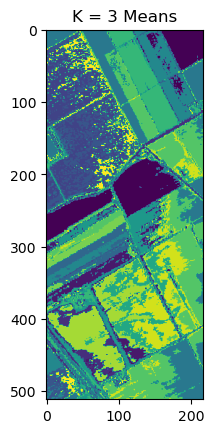

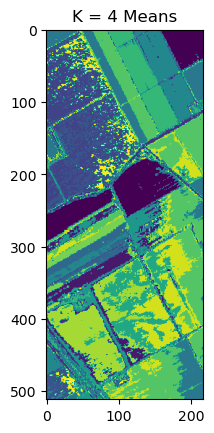

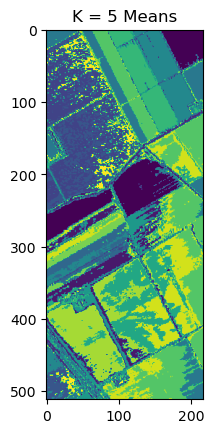

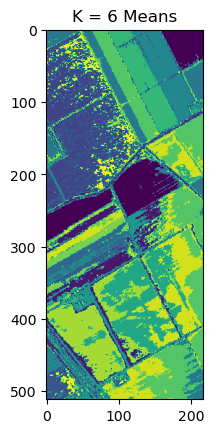

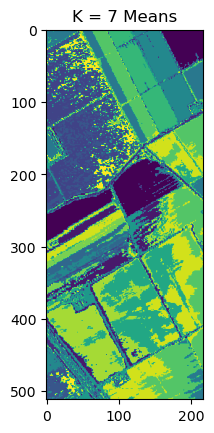

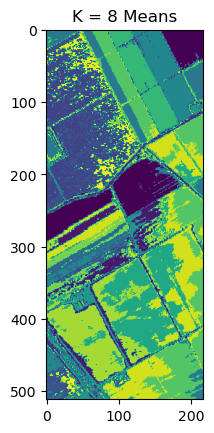

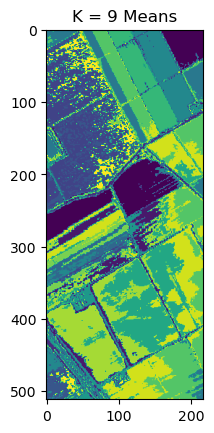

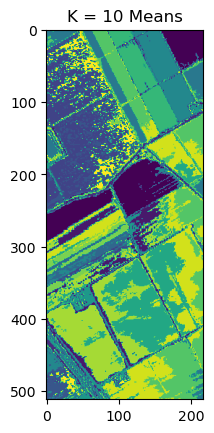

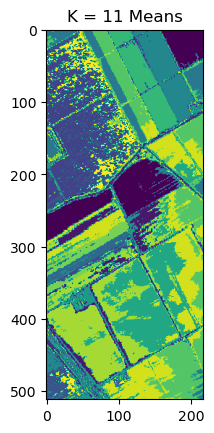

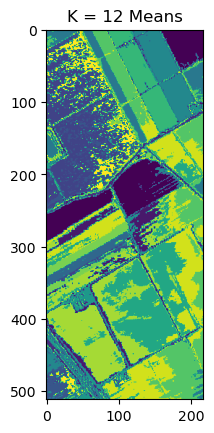

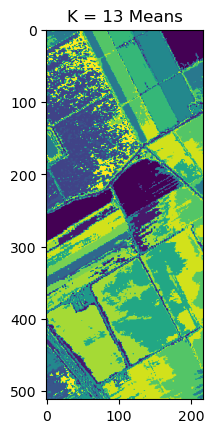

KeyboardInterrupt: 

In [22]:

# .mat dosyası okundu ve 3 boyutlu dataseti arraya aktarıldı.
arr = loadmat("Salinas_corrected.mat")
arr = arr["salinas_corrected"]



# K means algoritmasını başlatmak için 16 adet random x ve y koordinatı belirlendi (Salinas dataseti uzayı içerisinden).
centroidsx = np.random.default_rng()
centroidsx = centroidsx.integers(low=0, high=500, size=16)  

centroidsy = np.random.default_rng()
centroidsy = centroidsy.integers(low=0, high=200, size=16)  



# K means algoritmasında kullanılmak üzere 16*204 boyutunda mean oluşturuldu 
# ve random koordinatlardaki datalar bu mean arrayinin başlangıç değerleri oldu
mean = np.zeros(16*204).reshape(16,204)
for i in range(np.shape(mean)[0]):
    for j in range(204):
        mean[i][j] = arr[centroidsx[i]][centroidsy[i]][j] 
    
    
    
# K means algoritması
counter=0
while True:
    
    #k means sonucu oluşan öbeklenmiş görüntüyü saklar
    arr_new = np.zeros(512*217).reshape(512,217)
    
    # while döngüsünü sayar
    counter+=1
    
    # hangi koordinatın hangi kümeye yakın olduğu bilgisini saklar
    cluster = []

    # (512*217)'lük koordinatı dolaşan for döngüleri
    for i in range(np.shape(arr)[0]):
        for j in range(np.shape(arr)[1]):
            
            # ilgili koordinatın her küme mean'ine olan mesafesini saklar
            path = []
            
            # her küme için dolaşır
            for g in range(np.shape(mean)[0]):
                total=0
                
                # ilgili noktanın datalarının her kümenin mean'ine olan mesafesini hesaplayarak, ilgili noktanın her mean'e
                # olan mesafesi bulunur.
                for k in range(204):
                    total+=((arr[i][j][k] - mean[g][k])**2)
                    
                total=(total**0.5)
                path.append(total)
            
            # ilgili noktanın koordinat bilgileri ve en kısa mesafedeki küme bilgisi saklanır.
            vector = [np.argmin(path),i,j]
            
            # her koordinat için oluşturulan bir üst satırdaki bilgiler cluster arryinde toplanır. 
            cluster.append(vector)
                

    # her küme için dolaşan for döngüsü 
    for i in range(16):
        
        # ilgili kümede kaç vektör olduğunu sayar
        count=0 
        
        # ilgili kümedeki vektörleri dolaşır
        for j in cluster:
            if j[0]==i:
                
                # ilgili kümedeki her vektör sayılır
                count+=1
                # ilgili vektörün koordinat bilgileri alınır
                a = j[1]
                b = j[2]
                # yeni oluşturulan görüntüdeki ilgili koordinatın değeri belirlenir
                arr_new[a][b]=i
                
                # kümede bulunan vektörler toplanır
                for f in range(204):
                    mean[i][f] += arr[a][b][f]
                    
        # kümede bulunan vektörlerin toplamı, vektör sayısına bölünerek yeni mean (küme merkezi) bulunur.
        for f in range(204):
            mean[i][f] = mean[i][f]/count
    
    

    # öbeklenmiş görüntü ekrana bastırılır
    fig,ay=plt.subplots()
    title = "K = " + str(counter) + " Means"
    plt.title(title)
    ay.imshow(arr_new)
    plt.show()
    

    # counter daha fazla seçilirse daha iyi sonuç bulunur
    if counter == 16:
        break
        


#### NOT : Figürlerin başlıklarında K=1,2,3... diye belirtilen rakamlar aslında iteratif numarasıdır. Her figürde 16 küme bulunmaktadır. 
#### ERROR ise run etme işlemi çok uzun sürdüğünden 13. iterasyondan sonra kod bilinçli olarak durduruldu interrupta sokuldu.


### Hazır kod ile Kmeans (50.Band Görüntüsü)

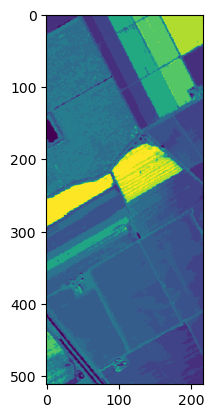

In [48]:
from sklearn.cluster import KMeans

# Kmeanse uygun olarak boyut düzenlemesi yapıldı
arr_kmeans=np.reshape(arr,(-1,204))

# kmeans
kmeans = KMeans(n_clusters=16,n_init=10)
kmeans.fit(arr_kmeans)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = np.reshape(segmented_img,(512,217,204))

# kmeans sonucu öbeklemiş görüntü 512x217x204 boyutundadır. 3 boyutlu matris imshow edilemediğinden dolayı
# 50. banddaki görüntü renk açısından daha uygun bulunduğundan 50. banddaki görüntü ekrana yazdırıldı.
segmented_img_new = np.zeros(512*217).reshape(512,217)           
for i in range(512):
    for j in range(217):
            segmented_img_new[i][j] = segmented_img[i][j][50] 
                           
# ekrana yazdırma                                       
plt.imshow(segmented_img_new)